In [2]:
import glob
import os
import tekwfm
import TekData
import matplotlib.pyplot as plt
import time

In [4]:
_s1 = time.time()
data_path = r"Z:\\SRAS Datasets\\customer042\\05202020_18mm18mm\\"
rf_file = "RF-00105.wfm"
dc_file = "DC-00105.wfm"
test_TekData = TekData.TekWaveForm(str(data_path + rf_file), str(data_path + dc_file))
_e = time.time()
print("Execution time: {0:.5f}".format(_e - _s1))

Execution time: 0.19400


In [6]:
#test_TekData.rf_data.__len__()

In [8]:
#test_TekData.isolate_packet()

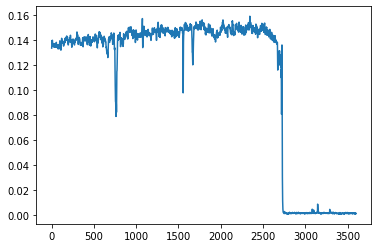

In [10]:
plt.plot(test_TekData.mean_dc_level)

Execution time: 0.02400


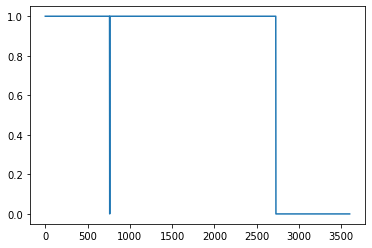

In [12]:
_s = time.time()
test_TekData.compute_mask()
plt.plot(test_TekData.dc_mask)
_e = time.time()
print("Execution time: {0:.5f}".format(_e - _s))

In [14]:
test_TekData.compute_fft()
plt.plot(test_TekData.full_frequencies)

AttributeError: 'TekWaveForm' object has no attribute 'full_frequencies'

Execution time: 19.14880


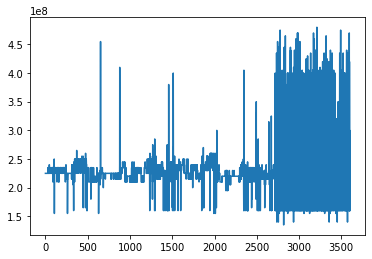

In [17]:
_s = time.time()
test_TekData.compute_fft("Window")
plt.plot(test_TekData.frequencies)
_e = time.time()
print("Execution time: {0:.5f}".format(_e - _s))

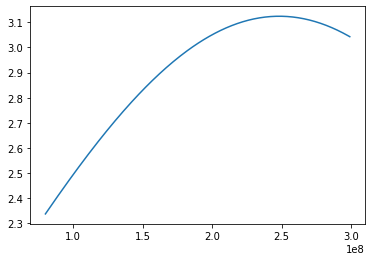

In [19]:
import numpy as np
test_TekData.psd_fits[2000]
freqarray = np.arange(80E6, 300E6, 1E6)
plt.plot(freqarray, test_TekData.gaussian_model(freqarray, *test_TekData.psd_fits[2000]))

Execution time: 19.03606


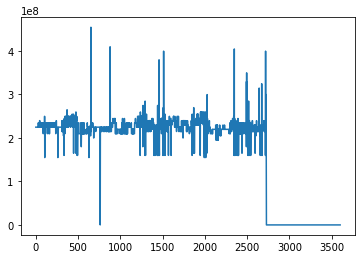

In [21]:
_s = time.time()
test_TekData.compute_fft("Full")
plt.plot(test_TekData.frequencies * test_TekData.dc_mask)
_e = time.time()
print("Execution time: {0:.5f}".format(_e - _s))

Execution time: 0.02600


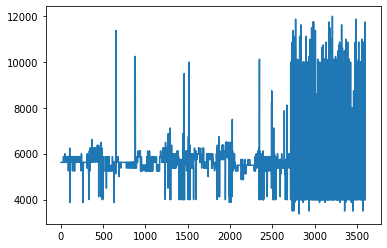

In [23]:
_s = time.time()
test_TekData.compute_velocity()
plt.plot(test_TekData.velocity_data)
_e = time.time()
print("Execution time: {0:.5f}".format(_e - _s))

In [25]:
_s = time.time()
test_TekData.map_rf_voltage()


,0
0,0.264
1,0.216
2,0.224
3,0.200
4,0.192
...,...
3596,0.056
3597,0.064
3598,0.064
3599,0.064


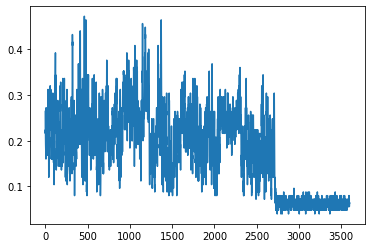

In [27]:
plt.plot(test_TekData.rf_voltage_data)

`for record_index in range(0, test_TekData.frames_in_file):
    _maxvoltidx = test_TekData._vtdf[record_index].idxmax()
    _maxvolt = test_TekData._vtdf.loc[_maxvoltidx, record_index]
    print("Max Voltage: {0}V at Record #{1}".format(_maxvolt, _maxvoltidx))
    `

In [29]:
test_TekData.rf_voltage_data

,0
0,0.264
1,0.216
2,0.224
3,0.200
4,0.192
...,...
3596,0.056
3597,0.064
3598,0.064
3599,0.064


In [31]:
import numpy as np
import scipy as sp
import pandas as pd
def gaussian(_x, _center, _ampltiude, _width):
    return _ampltiude * np.exp(-(_x - _center)**2 / _width)

_vt, _ts, _tsc, _tf, _tdf, _td = tekwfm.read_wfm('C:\\Users\\tka\\source\\repos\\data\\customer042\\PostFix\\TestScan_20\\RF-00100.wfm')
_vtdf = pd.DataFrame(_vt)
fft = sp.fft.rfft(_vtdf[1500].to_list())
freq = sp.fft.fftfreq(fft.__len__()) * 6.25E9
timescale = 1.0 / 6.25E9 


Text(0, 0.5, 'PSD')

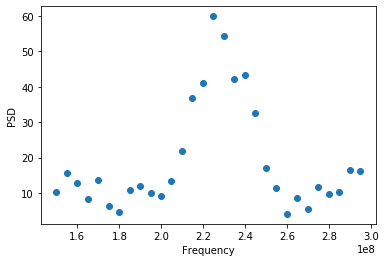

In [33]:
plt.scatter(freq[30:60], np.abs(fft[30:60]))
plt.xlabel("Frequency")
plt.ylabel("PSD")

In [35]:
windowfreq = freq[20:70]
windowfft = fft[20:70]

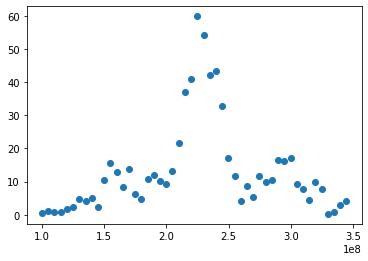

In [37]:
plt.scatter(windowfreq, np.abs(windowfft))

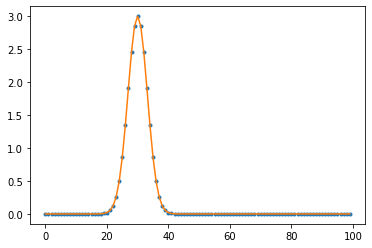

In [39]:
gaussian = lambda x: 3*np.exp(-(30-x)**2/20.)

data = gaussian(np.arange(100))

plt.plot(data, '.')

X = np.arange(data.size)
x = np.sum(X*data)/np.sum(data)
width = np.sqrt(np.abs(np.sum((X-x)**2*data)/np.sum(data)))

max = data.max()

fit = lambda t : max*np.exp(-(t-x)**2/(2*width**2))

plt.plot(fit(X), '-')

In [41]:
windowfft = np.abs(windowfft).tolist()
windowfreq = windowfreq.tolist()

util = TekData.Utilities()
from lmfit import Model
gmodel = Model(util.gaussian)
print("parameter names: {}".format(gmodel.param_names))
print("independent variables: {}".format(gmodel.independent_vars))
params = gmodel.make_params(amp=np.max(windowfft), cen=200E6, wid=30E6)
resultfit = gmodel.fit(windowfft, params, x=windowfreq)

AttributeError: 'list' object has no attribute 'tolist'

In [44]:
#plt.plot(windowfreq, np.abs(windowfft), '.')
#plt.plot(windowfreq, resultfit.best_fit)
#plt.plot(windowfreq, resultfit.init_fit)
#plt.xlim(80e6, 300e6)

ValueError: x and y must have same first dimension, but have shapes (20,) and (50,)

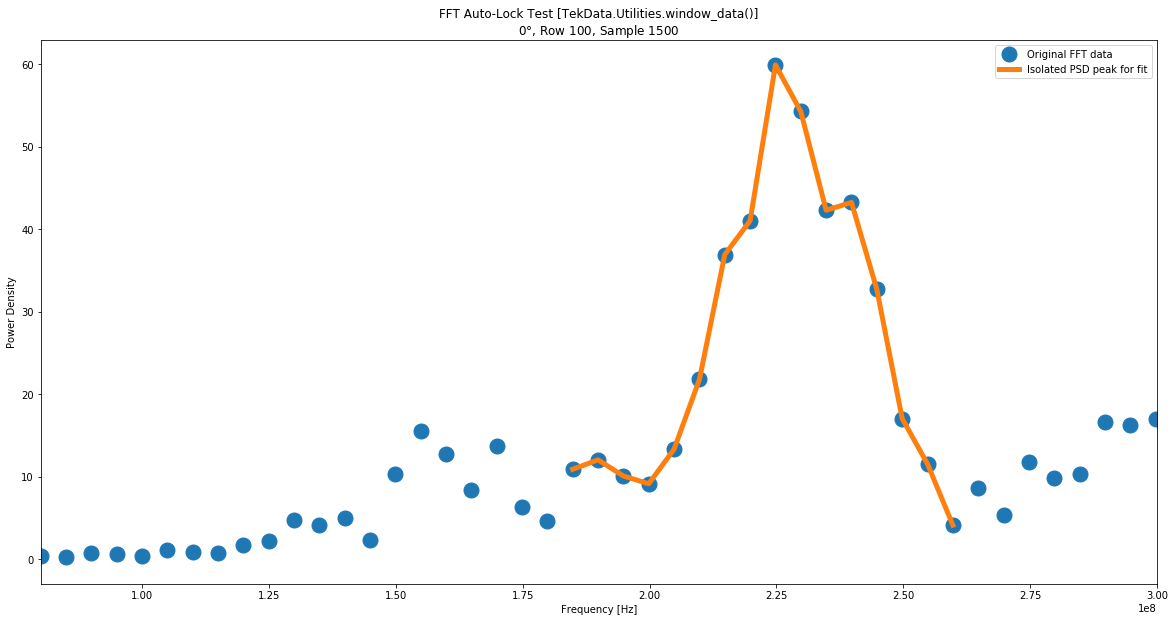

In [47]:
plt.figure(figsize=[20,10])
plt.title("FFT Auto-Lock Test [TekData.Utilities.window_data()]\n0$\degree$, Row 100, Sample 1500")
_winfft, _winfreq = util.window_data(fft, freq)
plt.plot(freq, np.abs(fft), '.', markersize=30)
plt.plot(_winfreq, _winfft, linewidth=5)
plt.xlim(80e6, 300e6)
plt.ylabel("Power Density")
plt.xlabel("Frequency [Hz]")
plt.legend(['Original FFT data', 'Isolated PSD peak for fit'])

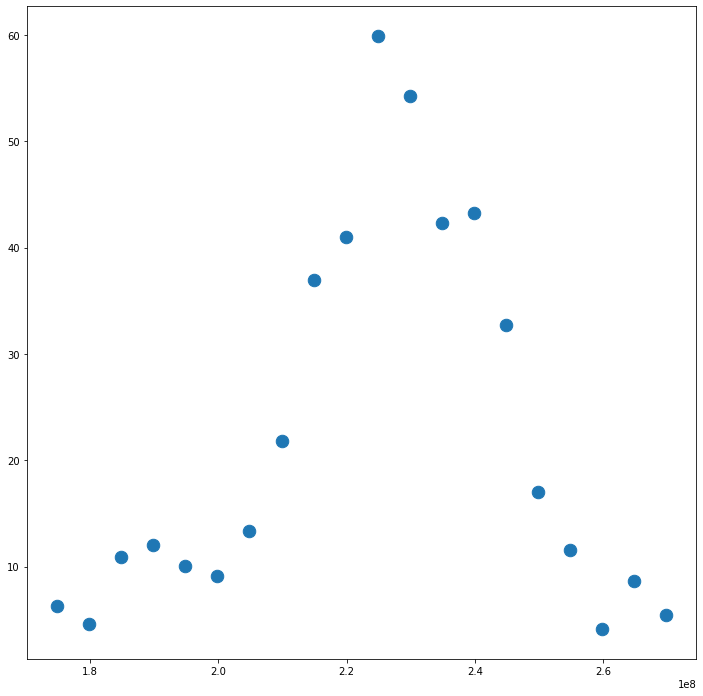

In [49]:
plt.figure(figsize=[12, 12])
windowfft = np.abs(fft[35:55])
windowfreq = freq[35:55]
plt.plot(windowfreq, windowfft, '.', markersize=25)


In [51]:
from lmfit import Model

def gaussian(x, amp, center, width):
    return amp * np.exp(-(x-center)**2 / width)

x = np.array(windowfreq)
y = np.array(windowfft)
init_vals = [y.max(), x[y.argmax()], 20E6]
best_vals, covariance = sp.optimize.curve_fit(gaussian, x, y, p0=init_vals, method='lm')

In [53]:
init_vals

[59.90546589588991, 224820143.88489208, 20000000.0]

In [55]:
best_vals

array([5.99054659e+01, 2.24820144e+08, 2.00000000e+07])

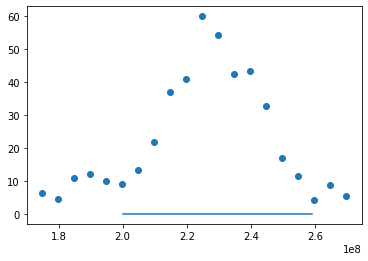

In [57]:
plt.scatter(x, y)
modelfreqs = np.arange(200E6, 260E6, 1E6)
plt.plot(modelfreqs, gaussian(modelfreqs, best_vals[0], best_vals[1], best_vals[2]))

In [59]:
from lmfit import Model
from lmfit.models import GaussianModel
gaussmodel = GaussianModel()



In [61]:
params = gaussmodel.make_params(amplitude=windowfft.max(), center=200E6, sigma=1)


In [63]:
result = gaussmodel.fit(windowfft, params, x=windowfreq)
print(result.init_fit)
print(result.best_fit)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [65]:
print(result.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 20
    # variables        = 3
    chi-square         = 16011.3609
    reduced chi-square = 941.844757
    Akaike info crit   = 139.706431
    Bayesian info crit = 142.693627
##  Warning: uncertainties could not be estimated:
    amplitude:  at initial value
    center:     at initial value
    sigma:      at initial value
[[Variables]]
    amplitude:  59.9054659 (init = 59.90547)
    center:     2.0000e+08 (init = 2e+08)
    sigma:      1.00000000 (init = 1)
    fwhm:       2.35482000 == '2.3548200*sigma'
    height:     23.8988243 == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


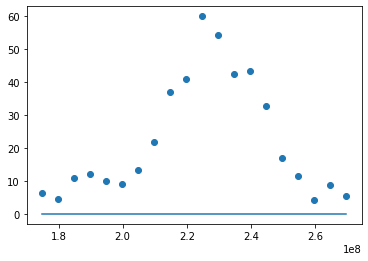

In [67]:
plt.scatter(windowfreq, windowfft)
plt.plot(windowfreq, result.best_fit)

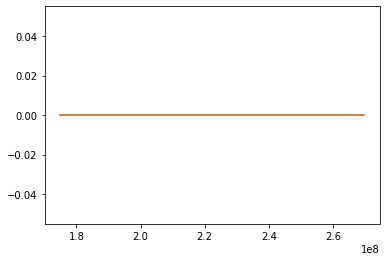

In [69]:
plt.plot(windowfreq, result.best_fit)
plt.plot(windowfreq, result.init_fit)

In [71]:
mean, std = sp.stats.norm.fit(windowfft, scale=10e6)

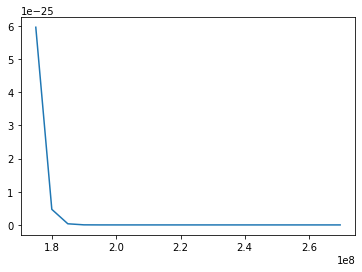

In [73]:
y = sp.stats.norm.pdf(windowfreq, mean*10e5, std*10e5)
plt.plot(windowfreq, y)

In [75]:
def newgauss(x, x0, y0, sigma):
    p = [x0, y0, sigma]
    return p[1] * np.exp(-((x-p[0])/p[2])**2)

p0 = [1., 1, 1.]
fit, tmp = sp.optimize.curve_fit(newgauss, windowfreq/1E8, windowfft, p0=p0)

In [76]:
fit

array([ 2.28409472, 52.96902585,  0.22027186])

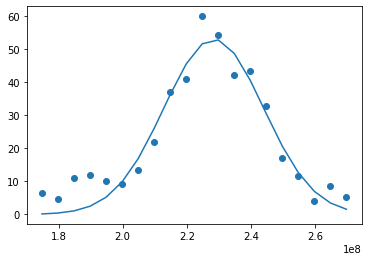

In [77]:
plt.scatter(windowfreq, windowfft)
plt.plot(windowfreq, newgauss(windowfreq/1e8, *fit))

In [78]:
windowfft

array([ 6.3255515 ,  4.62853448, 10.89283181, 12.03640367, 10.0799462 ,
        9.13410311, 13.32869305, 21.77761686, 36.91923103, 41.01802524,
       59.9054659 , 54.25953997, 42.28907521, 43.23770244, 32.69396748,
       17.04629531, 11.53140206,  4.11984352,  8.64003801,  5.40709713])